PROJECT
HOUSING: PRICE PREDICTION
Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.


Objective : To predict the housing prices in Australia using advanced regression


In [44]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
#Import dataset D:\train.csv D:\test.csv
df=pd.read_csv("D:\\train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [50]:
#checking the null values
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [51]:
# checking the shape of dataset
df.shape


(1168, 81)

In [52]:
# checking columns availabe in the dataset
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [55]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observations
1] There are 1168 rows and and 81 Columns but after treating nulls values and dropping unwanted columns the dataset now has 1080 rows and 72 columns

2] there are no duplicates in the dataset

3] the standrd deviation and max value is high inLotFrontage and LotArea columns

4] the standrd deviation is very high and crossing mean value in MasVnrArea column and Max value is also too high as compared to 75% quantile

5] the standrd deviation is very high and crossing mean value in BsmtFinSF1 and BsmtFinSF2 column and Max value is also too high as compared to 75% quantile

6] The GarageArea column look fine to me.

7] the standrd deviation is very high and crossing mean value in WoodDeckSF, OpenPorchSF column and Max value is also too high as compared to 75% quantile

8] I observe some problem in EnclosedPorch and ScreenPorch columns as all the quantile has zero value but max is too high.

9] the standrd deviation and max value is high SalePrice as it is our target varaible.



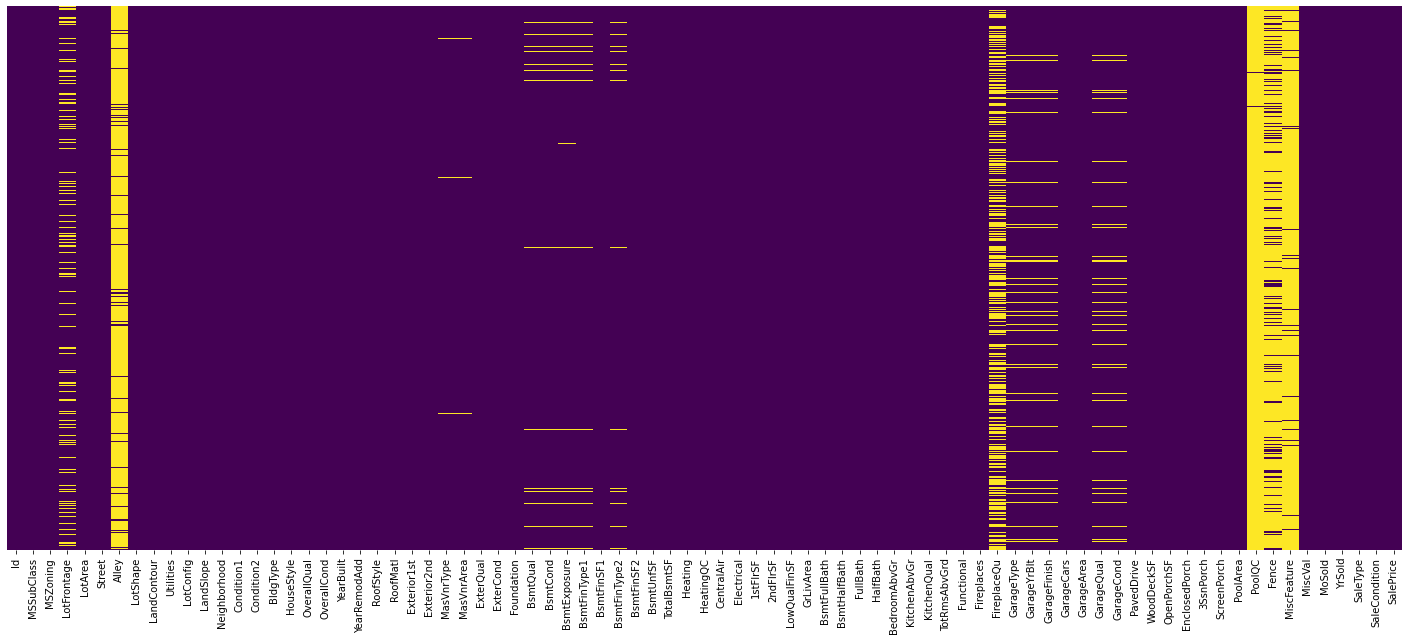

In [56]:
# checking all the nulls using the heatmap to get clear view
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


In [57]:
#Understand type of variables in data
df.dtypes.value_counts()


object     43
int64      35
float64     3
dtype: int64

43 text features and 38 numeric features



In [58]:
#Missing value ratio
#Removing columns having more than 75% missing values in entries
perc=df.isna().sum()/len(df)
cols_to_del = [col for col,val in perc.items() if val>0.75]
print("Columns removed",cols_to_del)


Columns removed ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [59]:
#Remove ID column since it has unique values and not useful for prediction
cols_to_del.append("Id")
df.drop(columns=cols_to_del,inplace=True)
df.shape


(1168, 76)

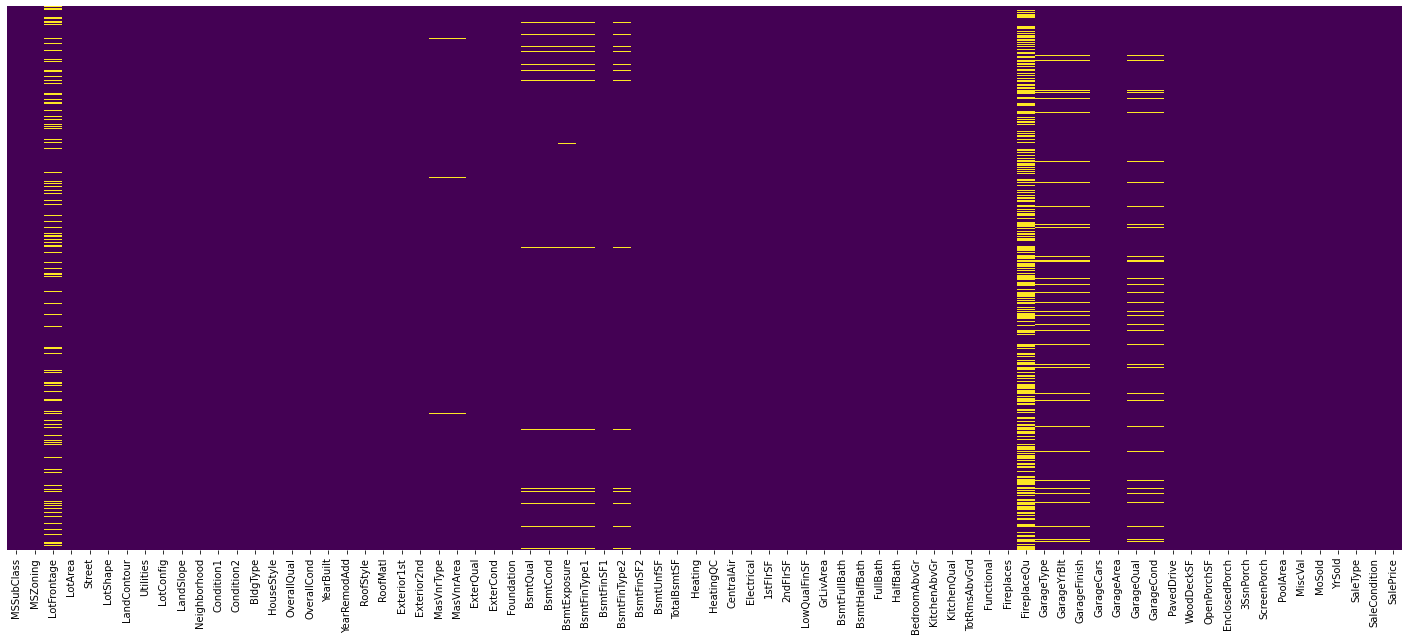

In [63]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


In [64]:
## Fill Missing Values one by one by mean and mode

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


#df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])


df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [65]:
#Remove duplicate records if present
dup_rows=data.duplicated().sum()
print("Duplicate records present in data are:",dup_rows)


Duplicate records present in data are: 0


In [66]:
#Removing columns with low variation in data
#Check categorical data
data_cat=data.select_dtypes(include=['object'])
cat_cols=list(data_cat.columns)
#Identify columns which have more than 90% of same category value
data_cols_var=[]
for cat in cat_cols:
    val_cnt=pd.DataFrame(data_cat[cat].value_counts(normalize=True))
    if float(val_cnt.max())>=0.9:
        data_cols_var.append(cat)
del_len=len(data_cols_var)
print(f"{del_len} Categorical Columns with more than 90% of single category : {data_cols_var}")


0 Categorical Columns with more than 90% of single category : []


In [71]:
#Remove low variation columns since they are not useful for prediction
df.drop(columns=data_cols_var,inplace=True)
df.shape


(1168, 76)

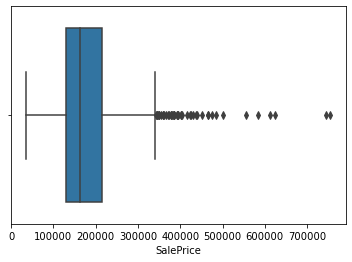

In [69]:
#Removing outliers - Target Variable
sns.boxplot(df["SalePrice"])
plt.show()


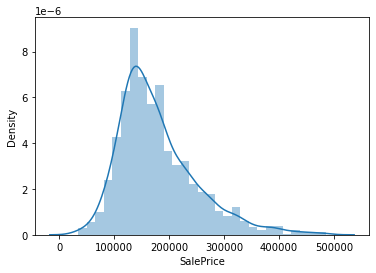

In [73]:
#We observe some outliers in the target Variable, we remove the extreme points above 500000 price
df=df[df["SalePrice"]<500000]
#Observing Distribution of sale price
sns.distplot(df["SalePrice"])
plt.show()


In [75]:
#Impute Missing Values
missing=df.isna().sum()
cols_missing_df = [col for col,val in missing.items() if val>0]
cat_missing_cols=list(df[cols_missing_df].select_dtypes(include=['object']).columns)
num_missing_cols=list(df[cols_missing_df].select_dtypes(include=['int64','float64']).columns)


In [77]:
#Impute using mode for categorical and median for numeric variables
for col in list(df.columns):
    if col in cat_missing_cols:
        mod=df[col].mode()
        df[col].fillna(mod,inplace=True)
    if col in num_missing_cols:
        med=df[col].median()
        df[col].fillna(med,inplace=True)


In [78]:
print("Shape of data after data cleaning",df.shape)


Shape of data after data cleaning (1161, 76)


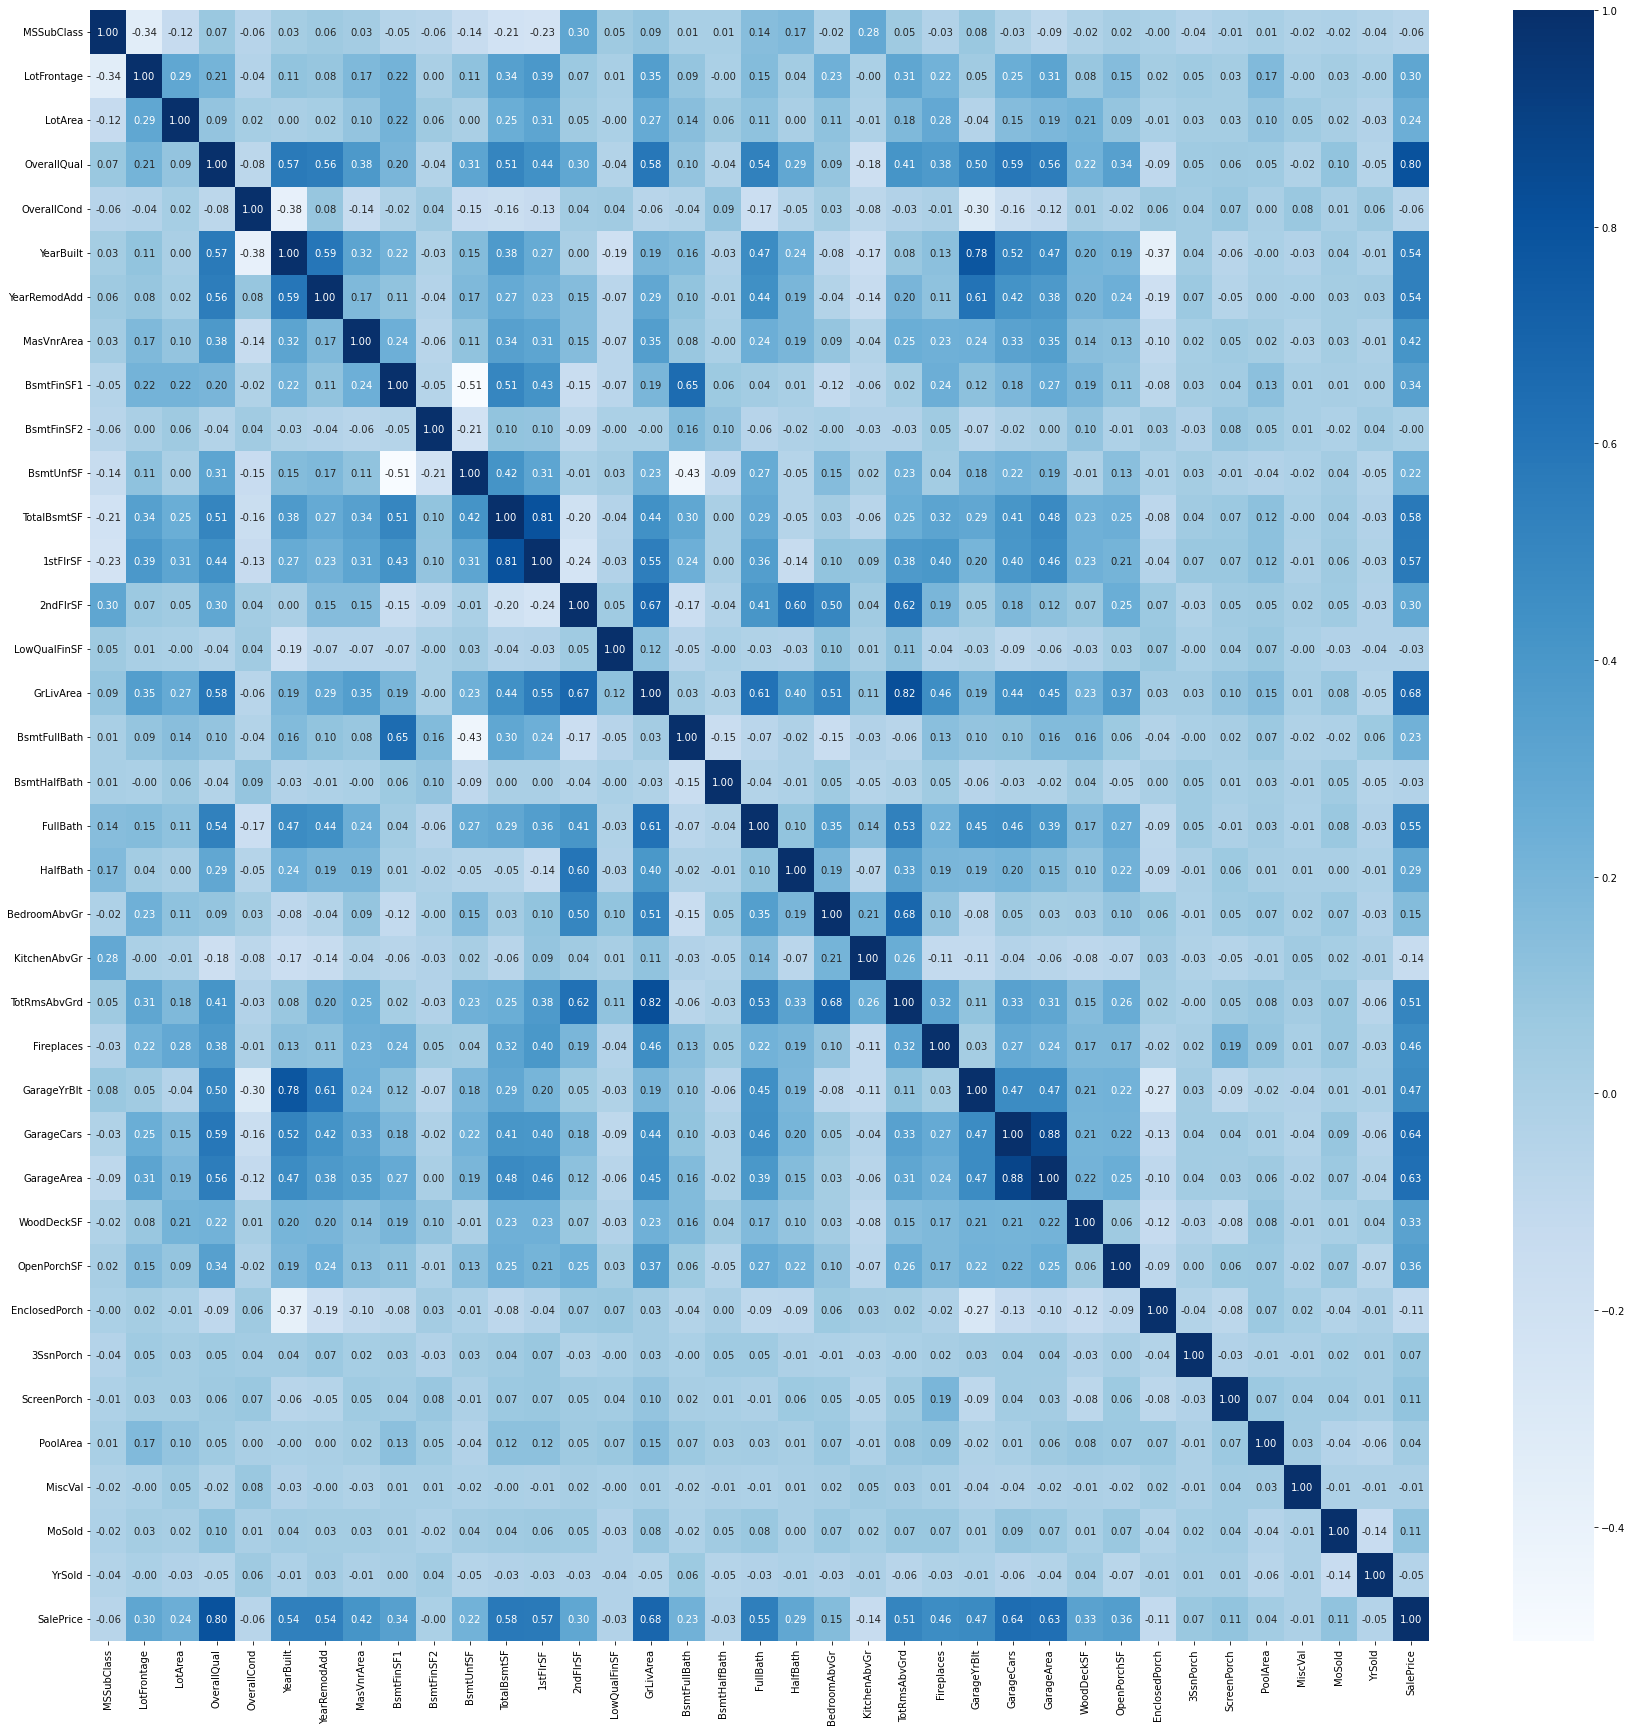

In [79]:
#Checking correlation of numeric variables with target variable(SalePrice)
num_cols=list(df.select_dtypes(include=['int64','float64']).columns)
plt.figure(figsize=(30,30))
corr_mat=df[num_cols].corr()
sns.heatmap(corr_mat,cmap="Blues",annot=True,fmt='.2f')
plt.show()


In [82]:
#Removing highly correlated features( corr >= 0.8) - Based on data dictionary understanding
#Correlated Features --> Feature kept in model
# 1. YrBuilt & GarageYrBlt --> YrBuilt
# 2. TotalBsmntSF & 1stFlrSF --> TotalBsmntSF
# 3. TotRmsAbvGrd & GrLivArea --> GrLivArea
# 4. GarageCars & GarageArea --> GarageCars
corr_num_vars=["GarageYrBlt","1stFlrSF","TotRmsAbvGrd","GarageArea"]

#Remove correlated feature from Data
df.drop(columns=corr_num_vars,inplace=True)
#Top correlating numeric features with Target Variable for EDA along with sale price
num_top=["OverallQual","GrLivArea","GarageCars","FullBath","TotalBsmtSF","SalePrice"]


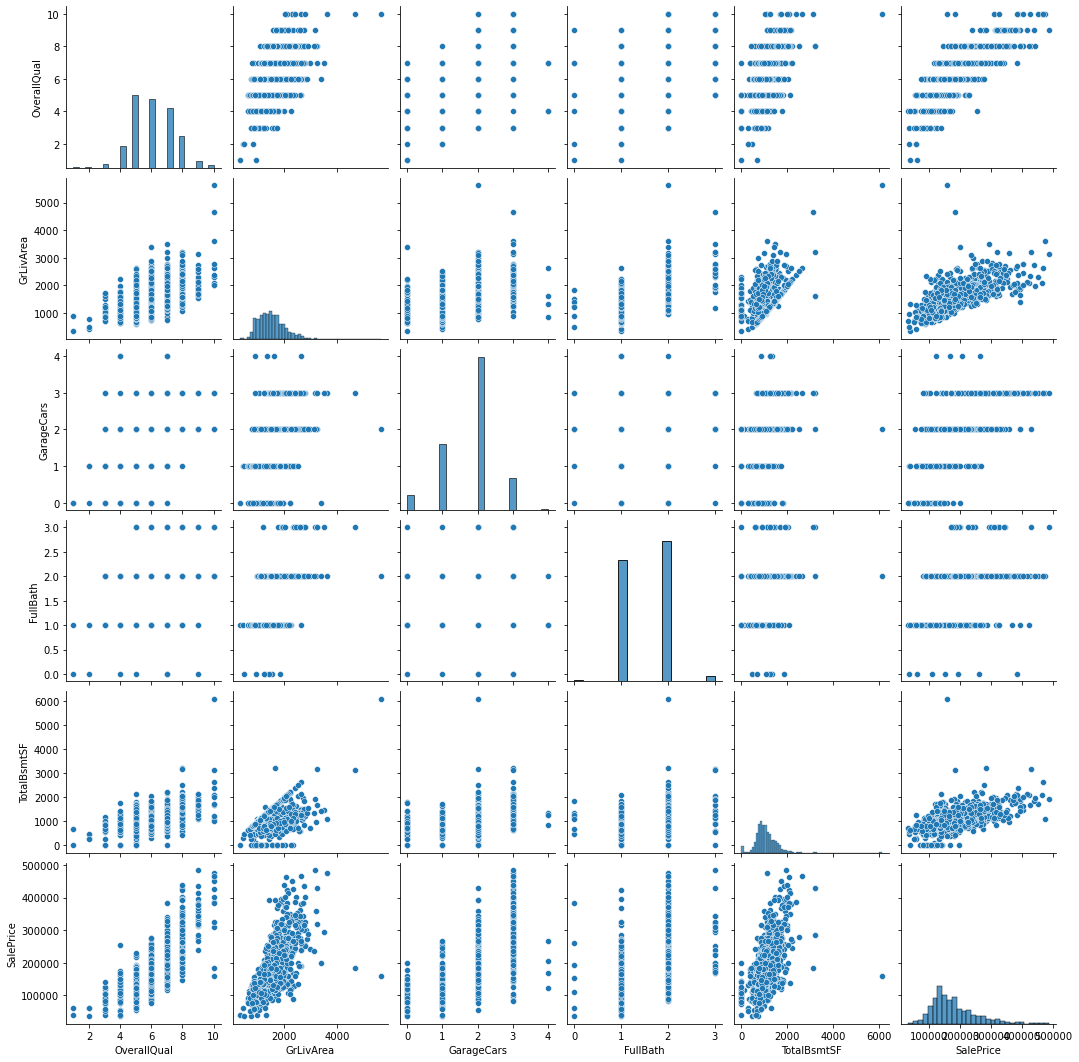

In [84]:
#EDA- Numeric Data - Top Features
df[num_top]
sns.pairplot(df[num_top])
plt.show()


The numeric features showed a linear correlation with the sale price(target variable), we can use the linear regression framework



In [91]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.00000,1161.000000
mean,56.817399,70.781682,10433.229974,6.084410,5.598622,1970.742463,1984.648579,98.272179,439.422911,46.928510,...,95.770026,46.316107,23.154177,3.661499,14.976744,2.991387,47.600345,6.354005,2007.80534,178800.288544
std,42.038727,22.241265,8941.766150,1.369535,1.126850,30.134125,20.793248,173.672656,454.603311,163.972377,...,125.883524,66.441373,63.356091,29.175125,54.991225,42.016416,544.888656,2.683202,1.32873,71085.522121
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000,34900.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.00000,130000.000000
50%,50.000000,70.988470,9500.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,384.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000,163000.000000
75%,70.000000,79.000000,11457.000000,7.000000,6.000000,2000.000000,2004.000000,157.000000,708.000000,0.000000,...,170.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000,214000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.00000,485000.000000


1] There are 1168 rows and and 81 Columns but after treating nulls values and dropping unwanted columns the dataset now has 1080 rows and 72 columns

2] there are no duplicates in the dataset

3] the standrd deviation and max value is high inLotFrontage and LotArea columns

4] the standrd deviation is very high and crossing mean value in MasVnrArea column and Max value is also too high as compared to 75% quantile

5] the standrd deviation is very high and crossing mean value in BsmtFinSF1 and BsmtFinSF2 column and Max value is also too high as compared to 75% quantile

6] The GarageArea column look fine to me.

7] the standrd deviation is very high and crossing mean value in WoodDeckSF, OpenPorchSF column and Max value is also too high as compared to 75% quantile

8] I observe some problem in EnclosedPorch and ScreenPorch columns as all the quantile has zero value but max is too high.

9] the standrd deviation and max value is high SalePrice as it is our target varaible.

Handling all categorical columns



In [92]:
cateforical_fetures = [feature for feature in df.columns if df[feature].dtypes=='O']
print(len(cateforical_fetures))
print(cateforical_fetures)


39
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


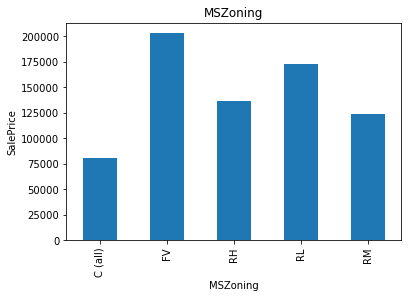

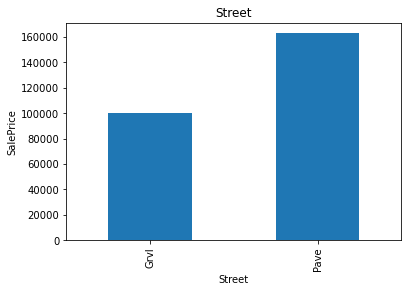

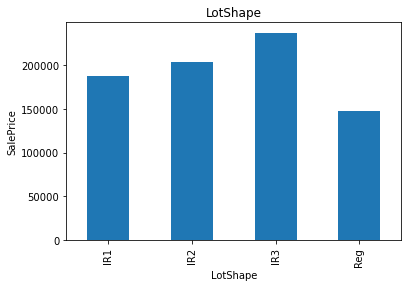

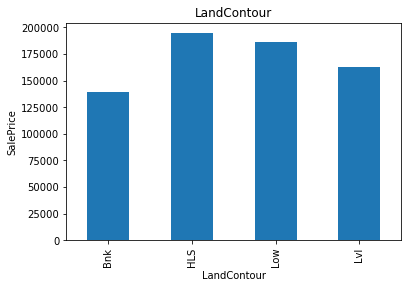

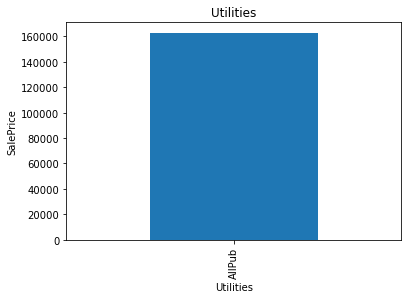

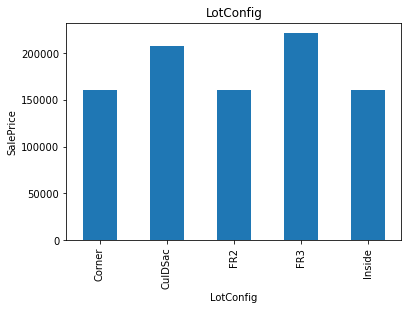

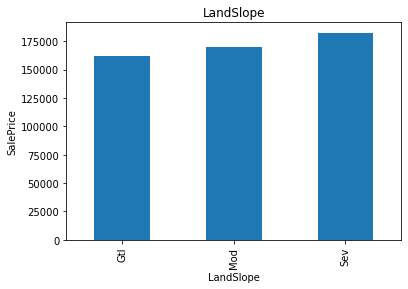

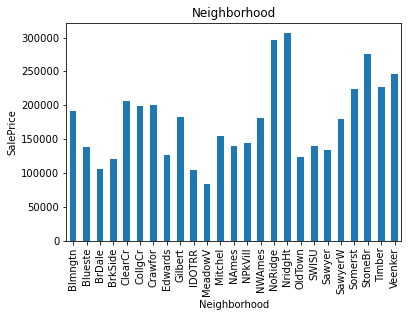

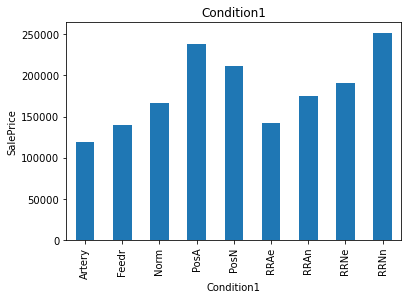

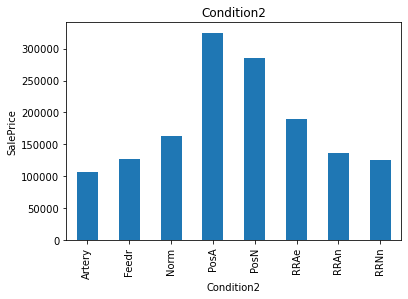

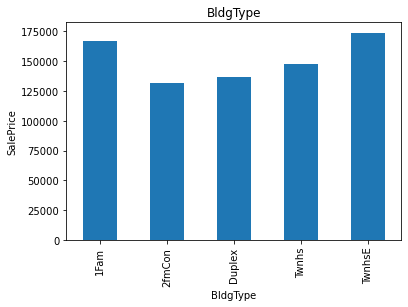

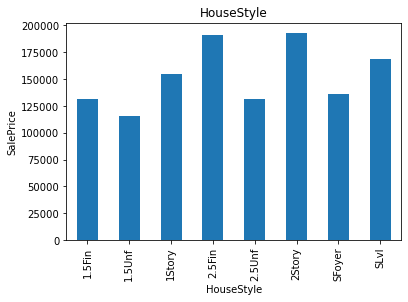

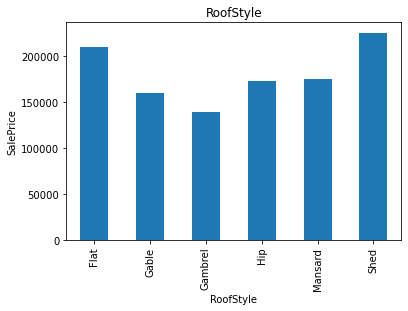

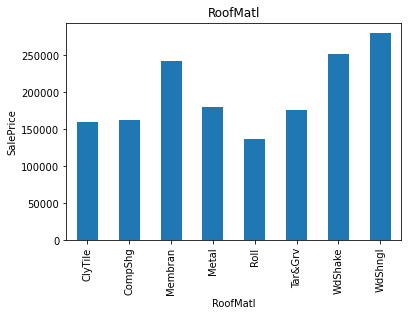

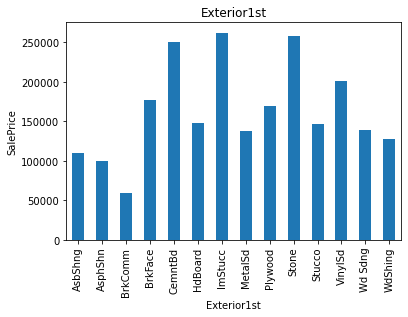

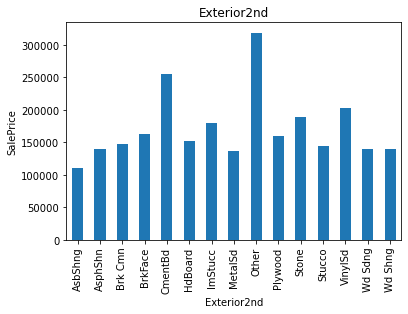

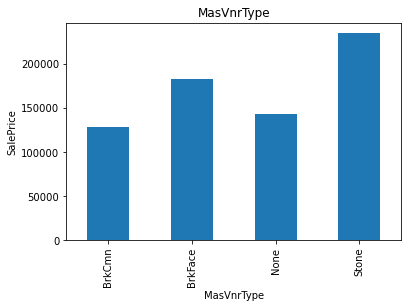

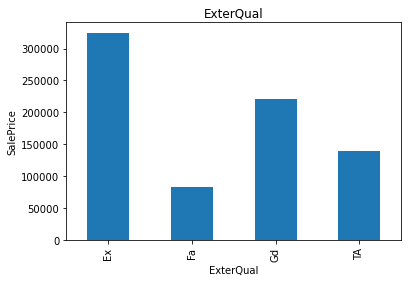

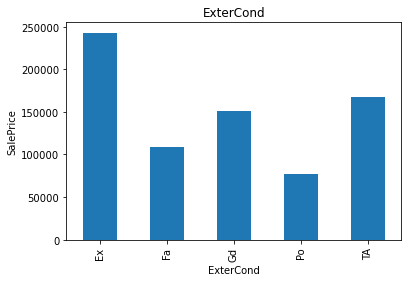

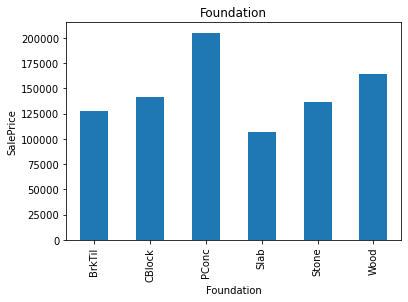

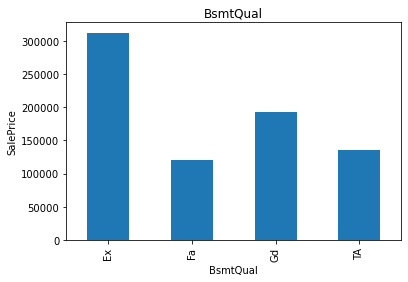

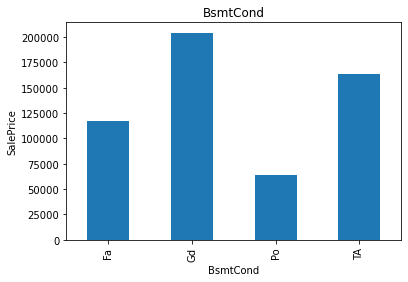

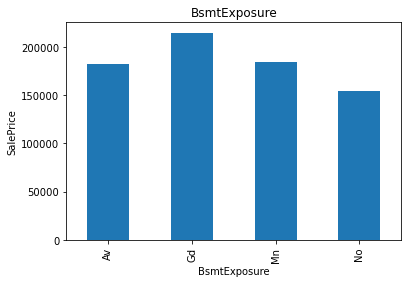

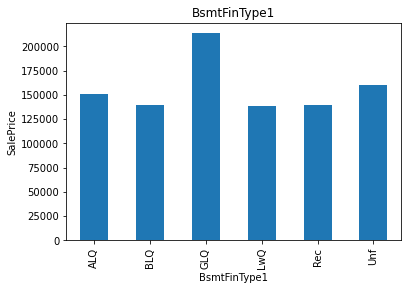

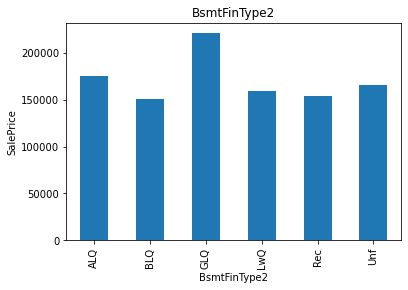

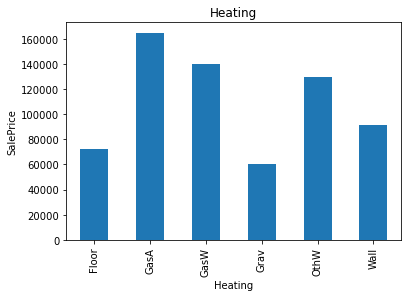

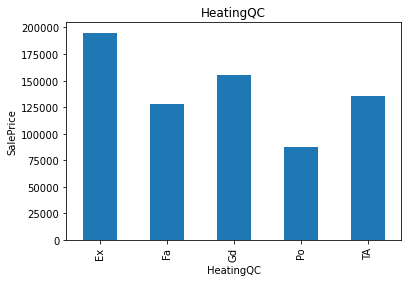

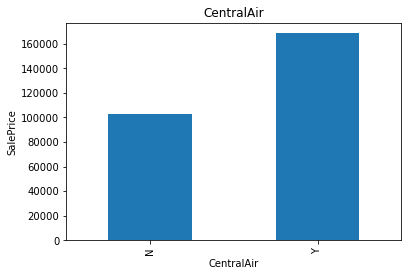

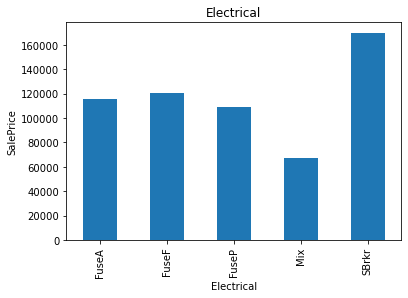

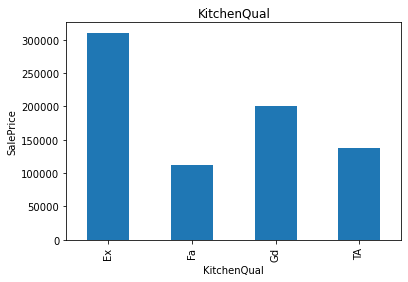

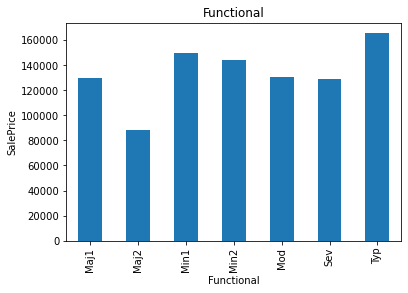

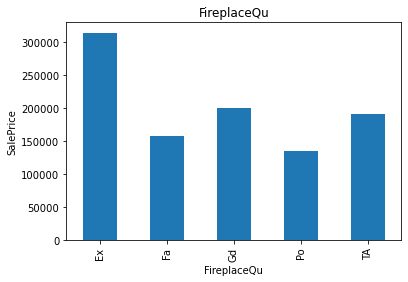

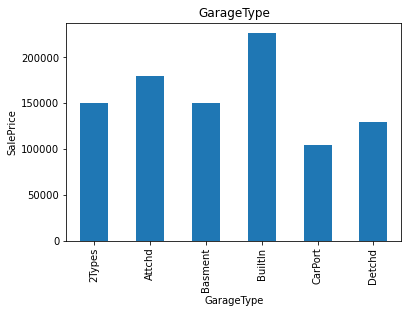

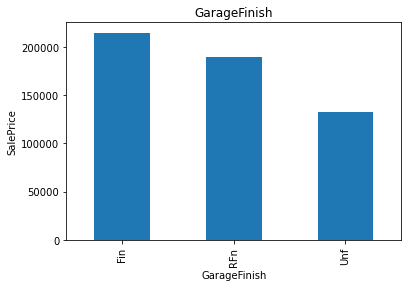

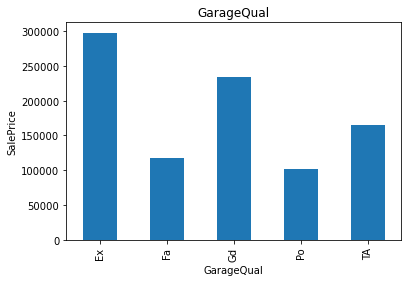

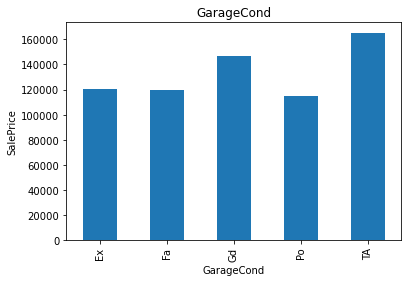

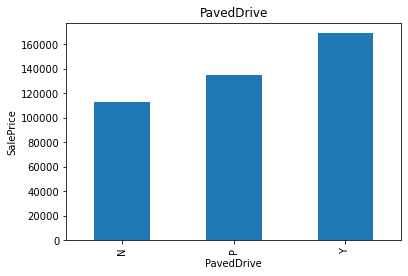

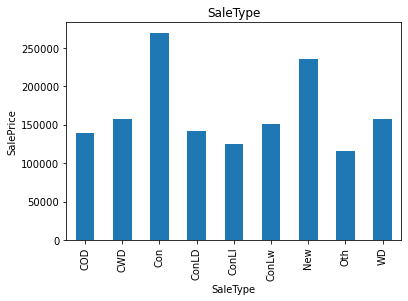

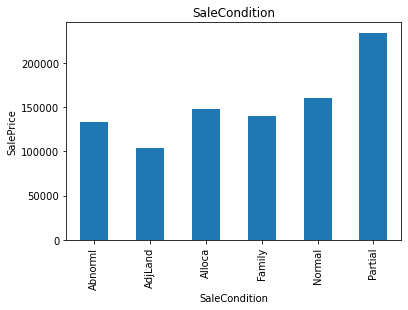

In [93]:
# comparing all categorical columns with our target variable
for feature in cateforical_fetures:
    df1 = df.copy()
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


Observations from above Graphs
1] So according to the MSZoning FV (Floating Village Residential) has the highest selling price followed by RL (Residential Low Density) and C (Commercial) has a low selling price

2] So According to the street graph, we have two types of roads Gravel and Paved so the road type pave has a high sale price as compared to gravel road type

3] So According to the Lotshape, The IR3 (Irregular) type has a high sale price followed by IR2(Moderately Irregular) and IR1 (Slightly irregular) and the least sale price is for REG (Regular) shape lot shape

4] So According to the LandCountour HLS(Hillside - Significant slope from side to side) and LOW (Depression) have equal and higher sale prices as compared to other Landcontour followed by LVL (Near Flat/Level) types of the LandContour

5] So According to the data, we have 4 types of utilities that are ALLPUB (All public Utilities (E, G, W,& S)), Nosewr (Electricity, Gas, and Water (Septic Tank)), Nosewa (Electricity and Gas Only), ELO (Electricity only) but according to our Graph we observe all the utilities in the dataset is only using 1 type of utilities that is AllPub (All public Utilities (E, G, W,& S))

6] So According to the lot configuration, we have 5 types of lot configuration that is Inside (Inside lot), Corner (Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of the property), FR3 (Frontage on 3 sides of property) and when we compare to the sale price we observe FR3 and CulDSac has Highest Selling price.

7] So according to the Landslope we have 3 types of landscape that is Gtl (Gentle slope), Mod (Moderate Slope), and Sev (Severe Slope), and when we compare to the sale price we observe Landslope which has the highest salingprice is Sev followed by Mod and Gtl

8] So according to the Neighbourhood, there are 25 unique types in the neighborhood and we observe NridgHt (Northridge Heights), and NWAmes (Northwest Ames) these 2 neighborhood has the highest selling price, and MeadowV (Meadow Village) has a low selling price

9] So according to the house style, we have 8 different house styles and in that 2Story and 2.5Fin (Two and one-half story: 2nd level finished) has the highest-selling Price as compared to other House styles

10] So according to the Roofstyle, we have 6 different roof style and we observe Flat and Shed has the highest selling price as compared to the other roof style

11] So according to the Exterior covering of the house, we have 17 different types of Exterior covering house but the most popular and highest selling are CemntBd (Cement Board), ImStucc (Imitation Stucco), and Stone (Stone)

12] So according to the type of Foundation use we have 5 different types of foundation and the highest selling is the PConc (Poured Concrete) type of foundation

13] So According to the Heating, we have 5 different types of heating but the most selling type of heating is GasA (Gas forced warm air furnace)

14] So According to the CentrailAir which house that has Central is the highest selling as compared to the house which does not have central air

15] So according to the Electrical System installed in every property the electrical system with SBrkr (Standard Circuit Breakers & Romex) has the highest selling price

16] So according to the GarageType, we have 6 different types of the garage but BuiltIn Built-In (The garage part of the house - typically has room above the garage) has the highest selling price



In [95]:
#Handling all numercial columns

numercial_features=[feature for feature in df.columns if df[feature].dtypes!='O']

print('Number of numerical features: ', len(numercial_features))

df[numercial_features].head()


Number of numerical features:  33


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [96]:
year_feature = [feature for feature in numercial_features if 'Yr' in feature or 'Year' in feature]

year_feature


['YearBuilt', 'YearRemodAdd', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

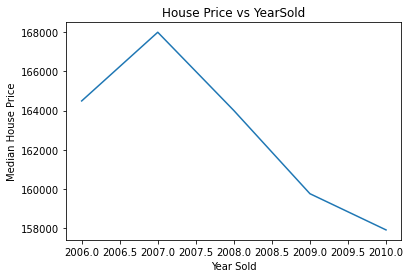

In [97]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')


From the above line plot, we observe house prices were increasing from the year 2006 to 2008 but after that, there is a sudden drop in the price of the house, and it continued till 2010 year.


In [98]:
discrete_feature = [feature for feature in numercial_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]

print('Discrete variables count : {}'.format(len(discrete_feature)))


Discrete variables count : 16


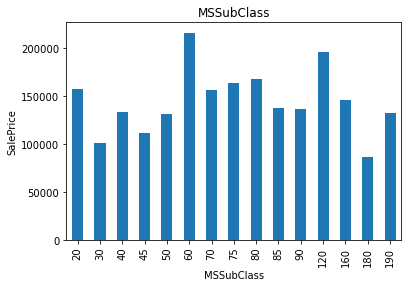

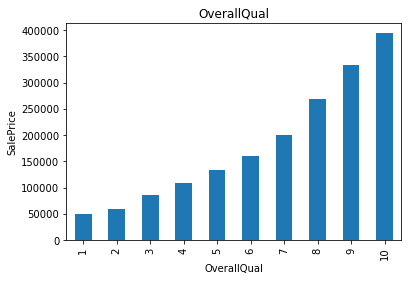

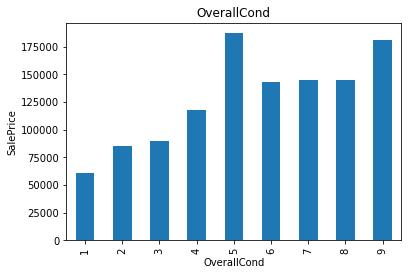

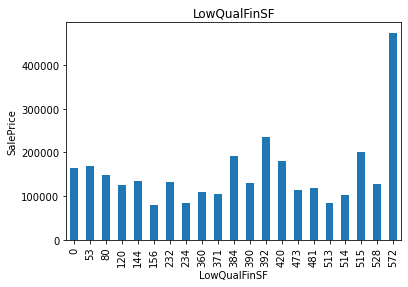

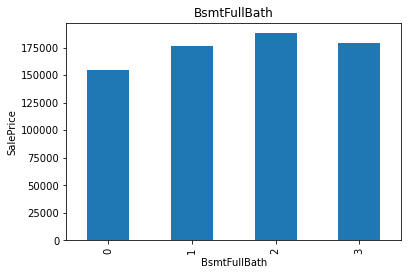

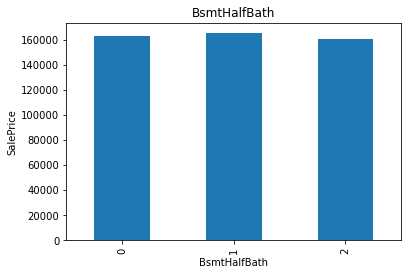

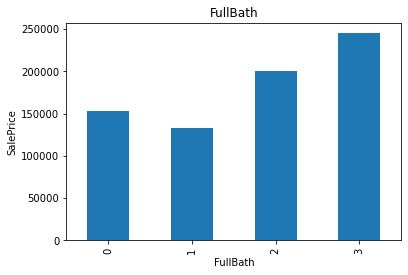

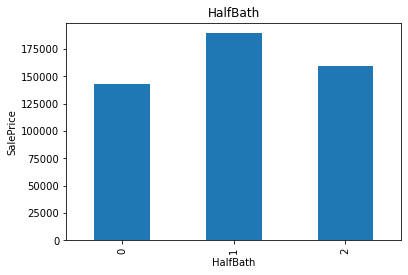

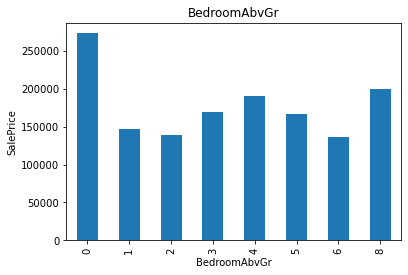

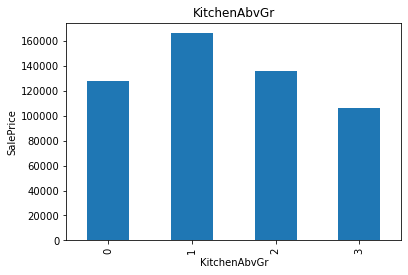

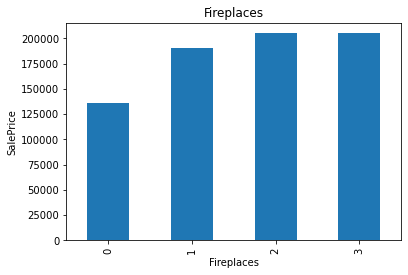

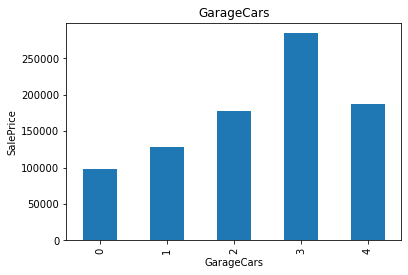

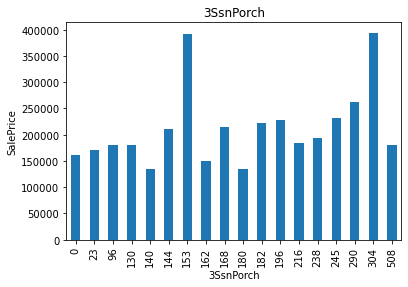

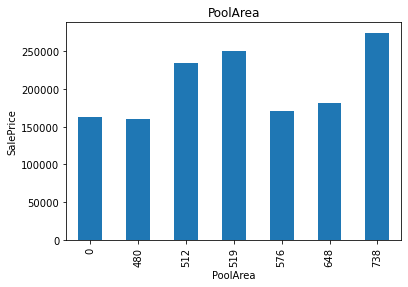

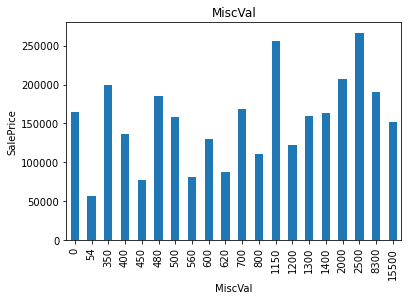

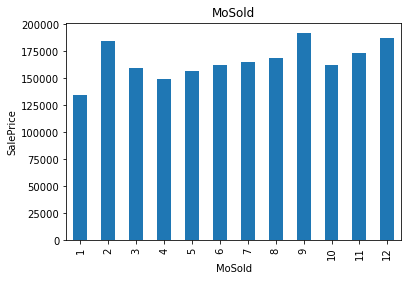

In [99]:
for feature in discrete_feature:
    df1 = df.copy()
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [100]:
#Handling all continuous columns
continuous_feature = [feature for feature in numercial_features if feature not in discrete_feature+year_feature+['Id']]

print('Continuous feature count {}'.format(len(continuous_feature)))


Continuous feature count 14


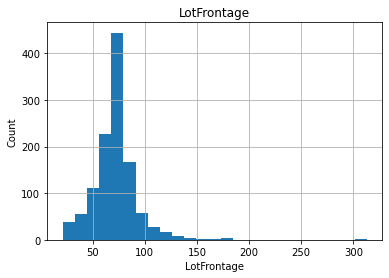

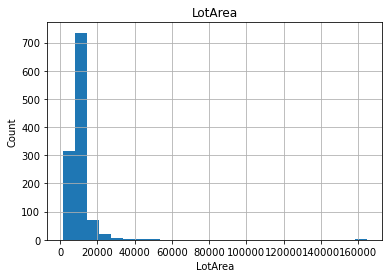

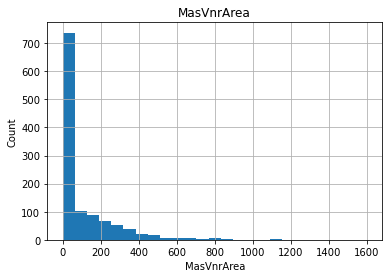

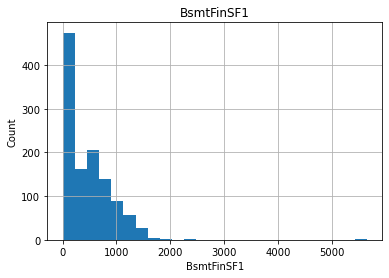

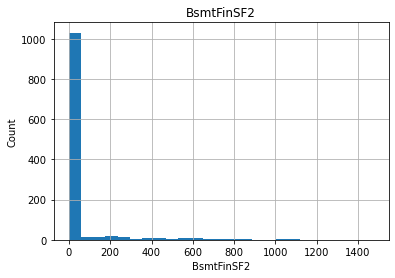

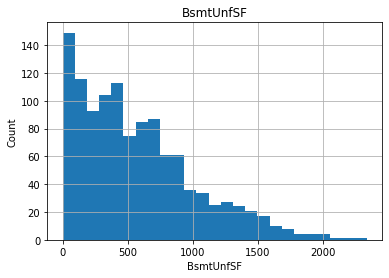

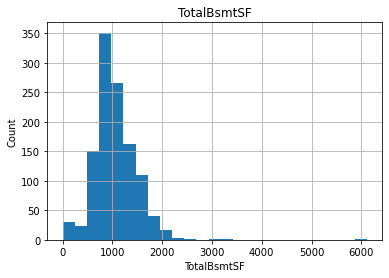

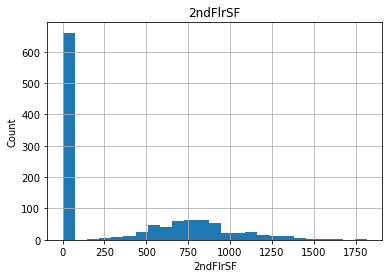

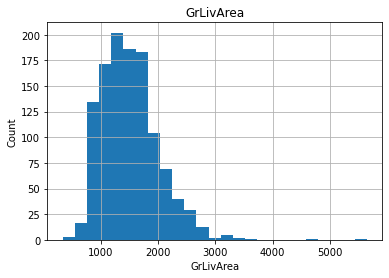

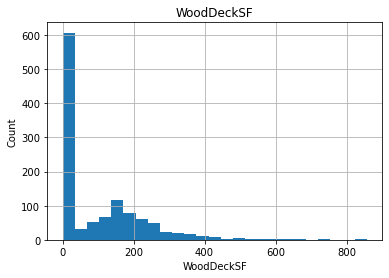

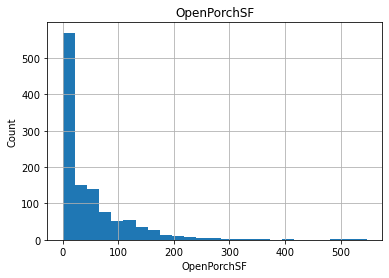

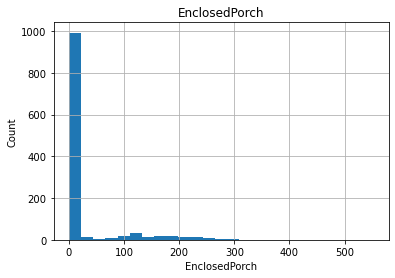

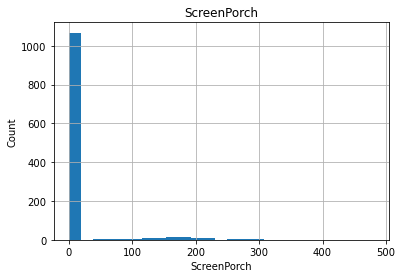

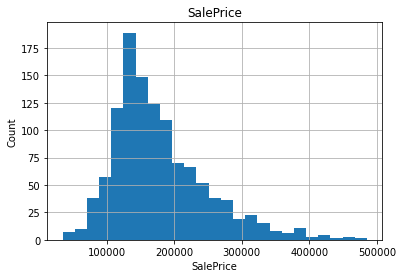

In [101]:
for feature in continuous_feature:
    df1 = df.copy()
    df1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


From the Above graph, we observe all the continuous data is right skewed and has a large number of outliers.


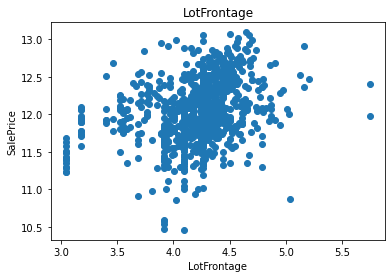

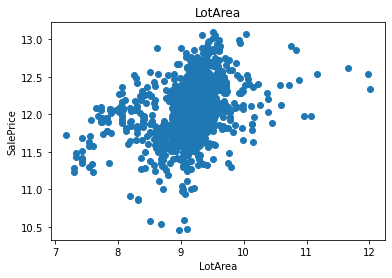

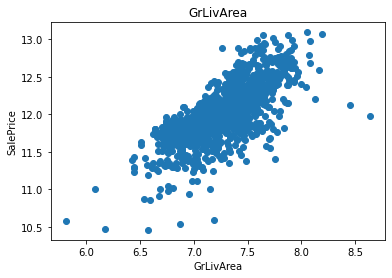

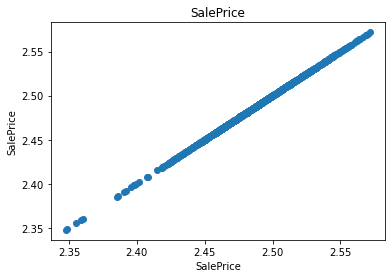

In [102]:
for feature in continuous_feature:
    df1 = df.copy(deep=True)
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature]=np.log(df1[feature])
        df1['SalePrice']=np.log(df1['SalePrice'])
        plt.scatter(df1[feature], df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()


From the above Scatter plot, we observe there is a trend (co-relation) between garage area vs Saleprice, GrlivArea vs Saleprice, and 1stFlrSF vs Saleprice.


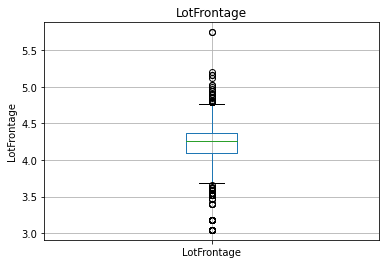

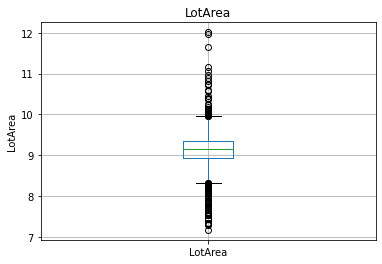

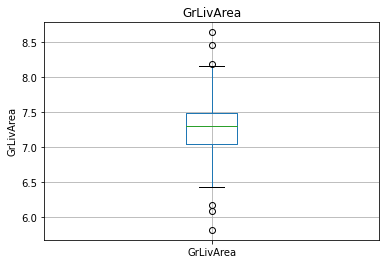

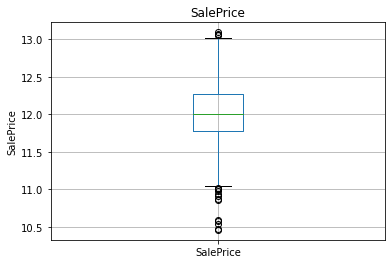

In [104]:
#Handling all continuous columns to see outliers

for feature in continuous_feature:
    df1 = df.copy(deep=True)
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature]=np.log(df1[feature])
        df1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [105]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate


Duplicate Rows :


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [106]:
categorical_features  = [feature for feature in df.columns if df[feature].dtypes=="O"]
categorical_features


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [107]:
#Appling Label Encoder to categorical_features

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [108]:
df2=le.fit_transform(df['MSZoning'])
pd.Series(df2)
df['MSZoning']=df2


In [109]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,3,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,3,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,3,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,3,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [110]:
df2=le.fit_transform(df['Street'])
pd.Series(df2)
df['Street']=df2


In [111]:
df2=le.fit_transform(df['LotShape'])
pd.Series(df2)
df['LotShape']=df2


In [112]:
df2=le.fit_transform(df['LandContour'])
pd.Series(df2)
df['LandContour']=df2


In [113]:
df2=le.fit_transform(df['Utilities'])
pd.Series(df2)
df['Utilities']=df2


In [114]:
df2=le.fit_transform(df['LotConfig'])
pd.Series(df2)
df['LotConfig']=df2


In [115]:
df2=le.fit_transform(df['LandSlope'])
pd.Series(df2)
df['LandSlope']=df2


In [116]:
df2=le.fit_transform(df['Neighborhood'])
pd.Series(df2)
df['Neighborhood']=df2


In [117]:
df2=le.fit_transform(df['Condition1'])
pd.Series(df2)
df['Condition1']=df2


In [118]:
df2=le.fit_transform(df['Condition2'])
pd.Series(df2)
df['Condition2']=df2


In [119]:
df2=le.fit_transform(df['BldgType'])
pd.Series(df2)
df['BldgType']=df2


In [120]:
df2=le.fit_transform(df['HouseStyle'])
pd.Series(df2)
df['HouseStyle']=df2


In [121]:
df2=le.fit_transform(df['RoofStyle'])
pd.Series(df2)
df['RoofStyle']=df2


In [122]:
df2=le.fit_transform(df['RoofMatl'])
pd.Series(df2)
df['RoofMatl']=df2


In [123]:
df2=le.fit_transform(df['Exterior1st'])
pd.Series(df2)
df['Exterior1st']=df2


In [124]:
df2=le.fit_transform(df['Exterior2nd'])
pd.Series(df2)
df['Exterior2nd']=df2


In [125]:
df2=le.fit_transform(df['MasVnrType'])
pd.Series(df2)
df['MasVnrType']=df2


In [126]:
df2=le.fit_transform(df['ExterQual'])
pd.Series(df2)
df['ExterQual']=df2


In [127]:
df2=le.fit_transform(df['ExterCond'])
pd.Series(df2)
df['ExterCond']=df2


In [128]:
df2=le.fit_transform(df['Foundation'])
pd.Series(df2)
df['Foundation']=df2


In [129]:
df2=le.fit_transform(df['BsmtQual'])
pd.Series(df2)
df['BsmtQual']=df2


In [130]:
df2=le.fit_transform(df['BsmtCond'])
pd.Series(df2)
df['BsmtCond']=df2


In [131]:
df2=le.fit_transform(df['BsmtExposure'])
pd.Series(df2)
df['BsmtExposure']=df2


In [132]:
df2=le.fit_transform(df['BsmtFinType1'])
pd.Series(df2)
df['BsmtFinType1']=df2

In [133]:
df2=le.fit_transform(df['BsmtFinType2'])
pd.Series(df2)
df['BsmtFinType2']=df2

In [134]:
df2=le.fit_transform(df['Heating'])
pd.Series(df2)
df['Heating']=df2

In [135]:
df2=le.fit_transform(df['HeatingQC'])
pd.Series(df2)
df['HeatingQC']=df2


In [136]:
df2=le.fit_transform(df['CentralAir'])
pd.Series(df2)
df['CentralAir']=df2


In [137]:
df2=le.fit_transform(df['Electrical'])
pd.Series(df2)
df['Electrical']=df2


In [138]:
df2=le.fit_transform(df['KitchenQual'])
pd.Series(df2)
df['KitchenQual']=df2


In [139]:
df2=le.fit_transform(df['Functional'])
pd.Series(df2)
df['Functional']=df2


In [140]:
df2=le.fit_transform(df['GarageType'])
pd.Series(df2)
df['GarageType']=df2

In [141]:
df2=le.fit_transform(df['GarageFinish'])
pd.Series(df2)
df['GarageFinish']=df2


In [142]:
df2=le.fit_transform(df['GarageQual'])
pd.Series(df2)
df['GarageQual']=df2


In [143]:
df2=le.fit_transform(df['GarageCond'])
pd.Series(df2)
df['GarageCond']=df2

In [144]:
df2=le.fit_transform(df['PavedDrive'])
pd.Series(df2)
df['PavedDrive']=df2


In [145]:
df2=le.fit_transform(df['SaleType'])
pd.Series(df2)
df['SaleType']=df2


In [146]:
df2=le.fit_transform(df['SaleCondition'])
pd.Series(df2)
df['SaleCondition']=df2


In [147]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,...,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,...,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,...,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,...,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,...,0,0,0,0,0,6,2009,8,4,215000


In [148]:
# checking datatypes after applying Label Encoder
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1161 non-null   int64  
 1   MSZoning       1161 non-null   int32  
 2   LotFrontage    1161 non-null   float64
 3   LotArea        1161 non-null   int64  
 4   Street         1161 non-null   int32  
 5   LotShape       1161 non-null   int32  
 6   LandContour    1161 non-null   int32  
 7   Utilities      1161 non-null   int32  
 8   LotConfig      1161 non-null   int32  
 9   LandSlope      1161 non-null   int32  
 10  Neighborhood   1161 non-null   int32  
 11  Condition1     1161 non-null   int32  
 12  Condition2     1161 non-null   int32  
 13  BldgType       1161 non-null   int32  
 14  HouseStyle     1161 non-null   int32  
 15  OverallQual    1161 non-null   int64  
 16  OverallCond    1161 non-null   int64  
 17  YearBuilt      1161 non-null   int64  
 18  YearRemo

In [175]:
 #53  FireplaceQu    610 non-null    object 
df.drop(['FireplaceQu'],axis=1,inplace=True)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1161 non-null   int64  
 1   MSZoning       1161 non-null   int32  
 2   LotFrontage    1161 non-null   float64
 3   LotArea        1161 non-null   int64  
 4   Street         1161 non-null   int32  
 5   LotShape       1161 non-null   int32  
 6   LandContour    1161 non-null   int32  
 7   Utilities      1161 non-null   int32  
 8   LotConfig      1161 non-null   int32  
 9   LandSlope      1161 non-null   int32  
 10  Neighborhood   1161 non-null   int32  
 11  Condition1     1161 non-null   int32  
 12  Condition2     1161 non-null   int32  
 13  BldgType       1161 non-null   int32  
 14  HouseStyle     1161 non-null   int32  
 15  OverallQual    1161 non-null   int64  
 16  OverallCond    1161 non-null   int64  
 17  YearBuilt      1161 non-null   int64  
 18  YearRemo

Plotting Disrtibution plot to see how data is distributed but we will observe for continuous data


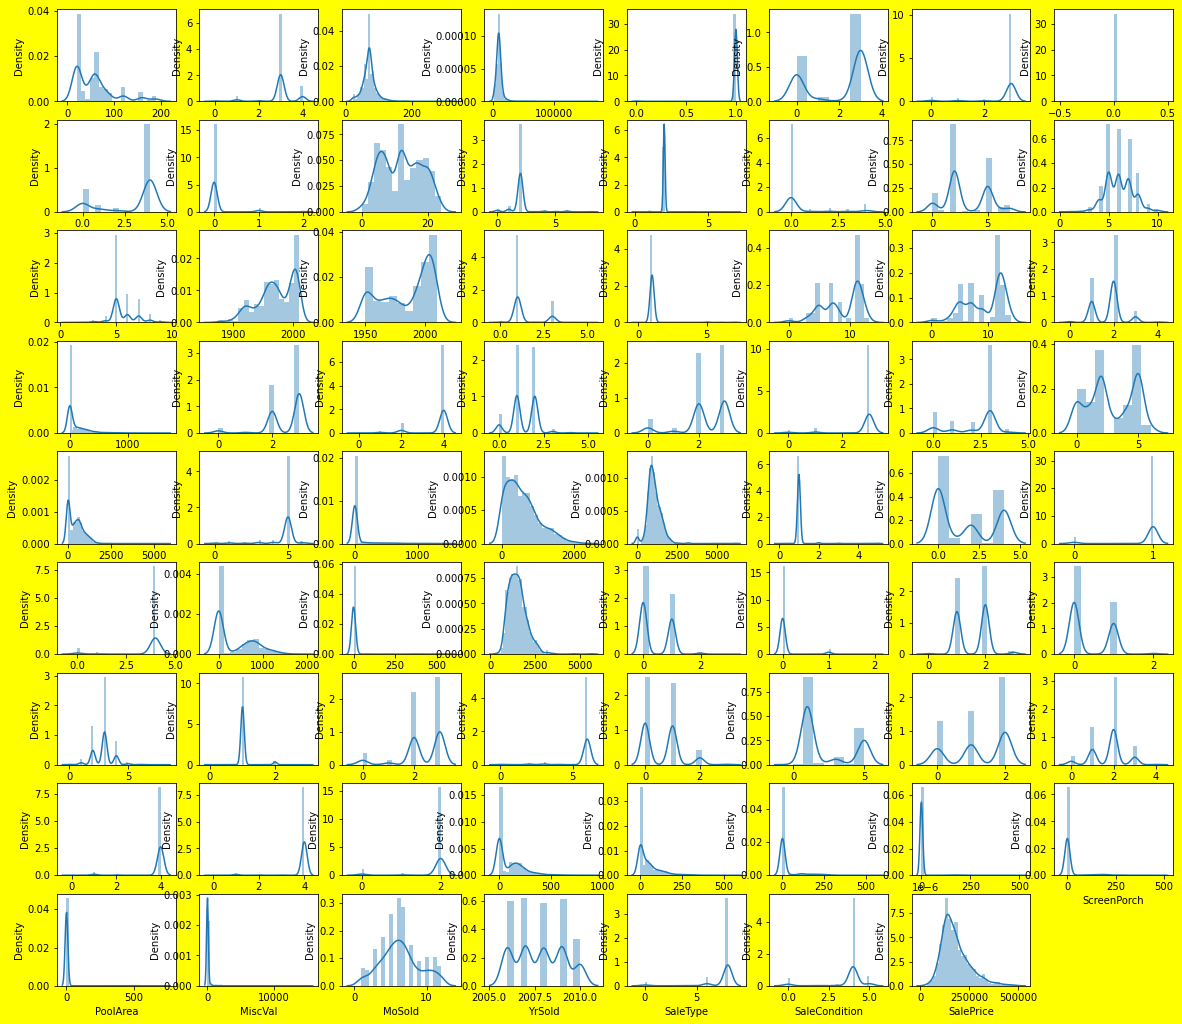

In [177]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,20) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 80:
        ax = plt.subplot(10,8,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
        plotnumber += 1
plt.show()


In [178]:
# seperate label n feature
X=df.drop(['SalePrice'], axis=1)
y=df.SalePrice


Plotting Scatter plot to see realtion between feature and label


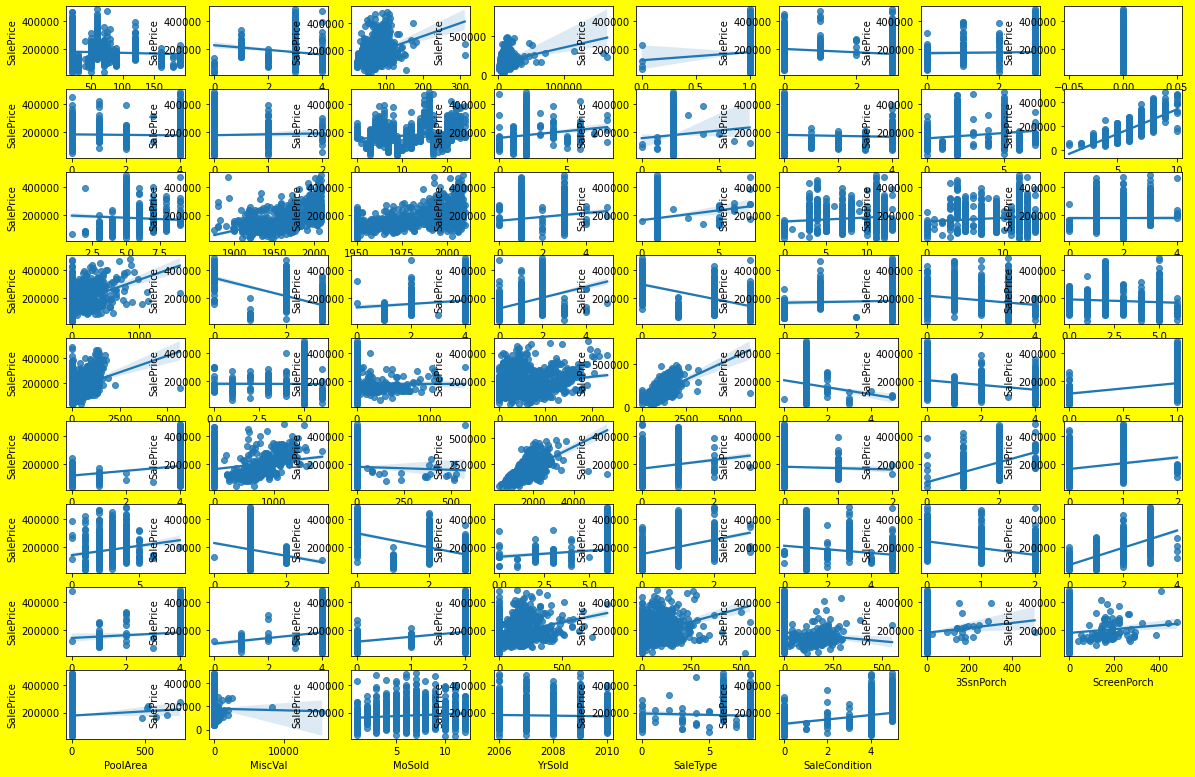

In [179]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 80:
        ax = plt.subplot(10,8,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()


Plotting Box plot to see outliers are present are not


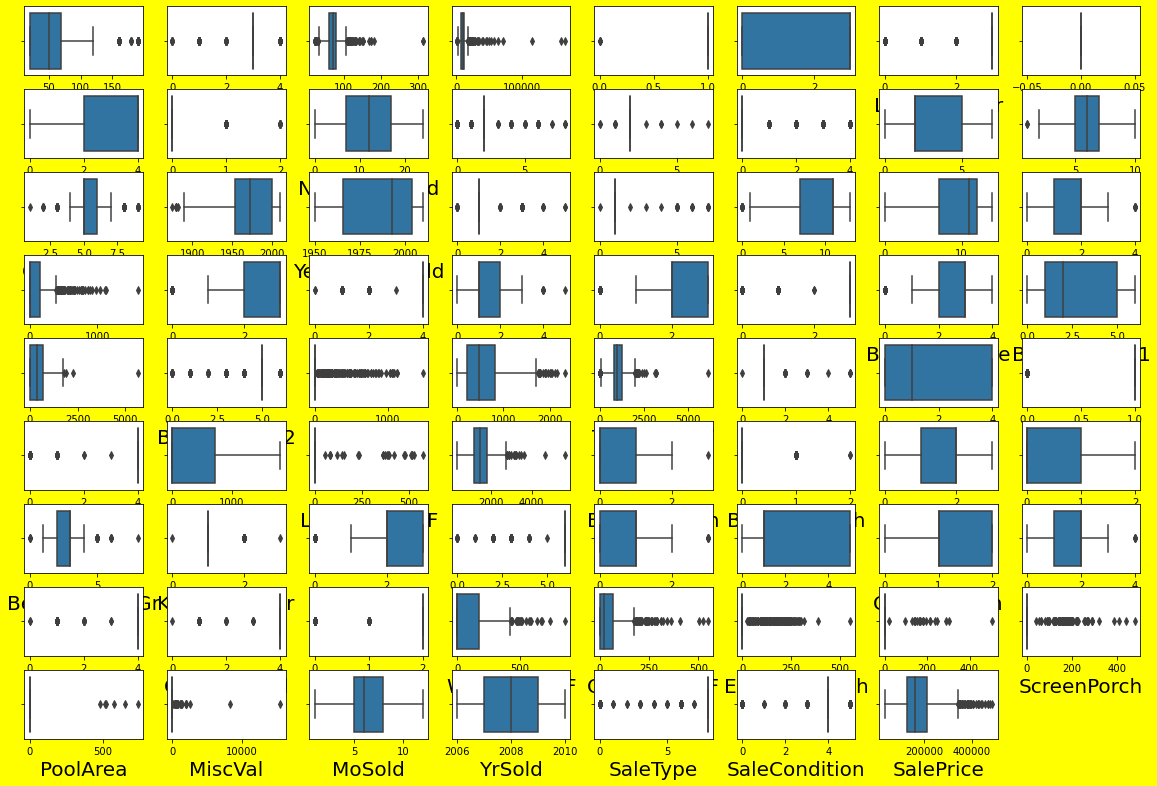

In [180]:
plt.figure(figsize=(20,15) , facecolor = 'yellow')
graph = 1

for column in df:
    
    if graph <= 80:
        plt.subplot (10,8,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()


In [181]:
#Treating outliers with Z-score method
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore


In [182]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)


<AxesSubplot:title={'center':'Correlation with target'}>

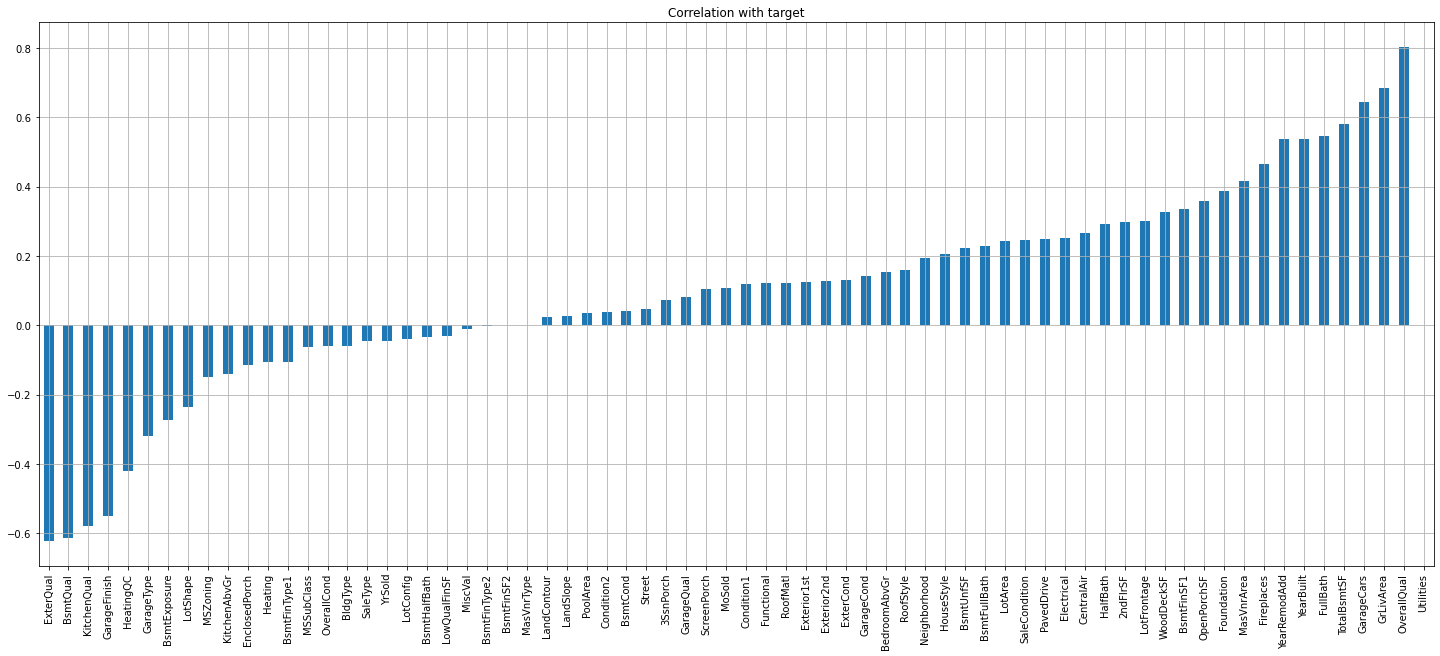

In [183]:
#  (code type      --   feature corrwith label)

df.drop('SalePrice' , axis =1 ).corrwith (df.SalePrice).sort_values().plot(kind='bar',grid=True,figsize=(25,10),title='Correlation with target')


In [184]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)


In [185]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  

vif['features']=X.columns  # seperate column for column features

vif.head(15)


,vif,features
0,4.994944,MSSubClass
1,1.343728,MSZoning
2,1.729107,LotFrontage
3,1.739616,LotArea
4,1.190382,Street
5,1.248632,LotShape
6,1.326138,LandContour
7,NaN,Utilities
8,1.148463,LotConfig
9,1.591069,LandSlope


so we observe all the values are inside 10 so selecting all the features.


In [186]:
df['Street'].value_counts()


1    1157
0       4
Name: Street, dtype: int64

In [187]:
df['SalePrice'].nunique()


574

In [188]:
#Using Feature Selection Technique SelectKBest
# selecting 12 best feature 
from sklearn.feature_selection import SelectKBest , f_classif


In [189]:
#select best feature
# selecting 20 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=20)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (20, 'Scores'))

    Feature_Name    Scores
15   OverallQual  5.142439
65       MiscVal  3.608193
25     ExterQual  3.343809
28      BsmtQual  2.743844
43     GrLivArea  2.694532
55    GarageCars  2.550986
50   KitchenQual  2.500191
46      FullBath  2.359852
54  GarageFinish  2.174789
17     YearBuilt  2.137928
4         Street  1.858118
3        LotArea  1.821410
18  YearRemodAdd  1.820990
36   TotalBsmtSF  1.778634
37       Heating  1.728514
1       MSZoning  1.660072
24    MasVnrArea  1.596735
52    Fireplaces  1.577539
39    CentralAir  1.575587
27    Foundation  1.535922


In [194]:
# with using SelectKBest feature selection technique we select top 20 features.
new_X=df[['Street','OverallQual','ExterQual','GrLivArea','BsmtQual','GarageCars','KitchenQual','FullBath','YearBuilt','GarageFinish','MSZoning','MasVnrArea','LotArea','YearRemodAdd','TotalBsmtSF','Foundation']]


In [195]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)


# Linear Regression Model


In [196]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [197]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)


Training Score 83.43450273431169 RandomState 0
Testing Score 69.67235931099196 RandomState 0


MAXINING TESTING SCORE 69.67235931099196 ON RANDOM STATE OF 0
Training Score 83.32561129599021 RandomState 1
Testing Score 68.03971411649596 RandomState 1


Training Score 78.31895114052182 RandomState 2
Testing Score 84.81192402761837 RandomState 2


MAXINING TESTING SCORE 84.81192402761837 ON RANDOM STATE OF 2
Training Score 82.9617632688062 RandomState 3
Testing Score 70.99956780991103 RandomState 3


Training Score 85.50613772907417 RandomState 4
Testing Score 56.53151164010115 RandomState 4


Training Score 80.83791796207045 RandomState 5
Testing Score 78.15773621113674 RandomState 5


Training Score 83.9955807004502 RandomState 6
Testing Score 62.51678347140588 RandomState 6


Training Score 79.03366042276335 RandomState 7
Testing Score 84.58910657428989 RandomState 7


Training Score 78.98996041038906 RandomState 8
Testing Score 82.92052847967292 RandomState 8


Training Score 79.80703

In [198]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)


MAXINING TESTING SCORE 86.26782961683473 ON RANDOM STATE OF 154


#Training the model


In [199]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=163)


In [200]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [201]:
#training score
regression.score(X_train,y_train)  


0.7919506573858934

In [202]:
#testing score
regression.score(X_test,y_test) 


0.8261168860566539

Model Score
Training Score = 0.7919506573858934

Testing Score = 0.8261168860566539

 

Checking MAE , MSE & RMSE scores


In [204]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [205]:
#MAE
mean_absolute_error(y_test,y_pred)


76244.84210075082

In [206]:
#MSE
mean_squared_error(y_test,y_pred)


9355410168.645483

In [207]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))


96723.36929948979

score

MAE SCORE = 76244.84210075082

MSE SCORE = 9355410168.645483

MSE SCORE = 96723.36929948979
 

# lasso model


In [209]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


In [210]:
lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)


LassoCV(max_iter=100)

In [211]:
# best aplha parameter
alpha = lasscv.alpha_
alpha


1193.400834973225

In [212]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)


Lasso(alpha=1193.400834973225)

In [213]:
# now check r2 score
lasso_reg.score(X_test,y_test)


0.819230043378805

# RIDGE MODEL


In [215]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [216]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha


0.09099999999999998

In [217]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)


Ridge(alpha=0.09099999999999998)

In [218]:
# now check r2 score
ridge_reg.score(X_test,y_test)


0.8261154995246194

In [ ]:
SCORES

LASSO SCORES = 81.9230043378805%


RIDGE SCORES = 82.61154995246194 %
 

# Cross-Validation for Linear Regression Model


In [219]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')


At cross fold 2 the cv score is 0.7751203630590094 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 3 the cv score is 0.7754097716986802 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 4 the cv score is 0.7886322368558192 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 5 the cv score is 0.7756496406851278 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 6 the cv score is 0.777834991986264 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 7 the cv score is 0.779731335206414 and the R2 score for Training is 0.7919506573858934 and R2 score for the Testing is0.8261168860566539


At cross fold 8 the cv score is 0.7773305414416545 and the R2 score for 

Cross Validation score

Cross-Validation Score at cv = 4 = 77 %

Training score = 79 %

Testing Score = 82 %
 

AdaBoostRegressor Model


In [220]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [221]:
#Finding the Best Random State

#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)



Training Score 86.1580697806774 RandomState 0
Testing Score 79.42030126314116 RandomState 0


MAXINING TESTING SCORE 79.42030126314116 ON RANDOM STATE OF 0
Training Score 84.95531539698104 RandomState 1
Testing Score 81.07680583279799 RandomState 1


MAXINING TESTING SCORE 81.07680583279799 ON RANDOM STATE OF 1
Training Score 85.3328080801074 RandomState 2
Testing Score 82.81039487688126 RandomState 2


MAXINING TESTING SCORE 82.81039487688126 ON RANDOM STATE OF 2
Training Score 84.8153927866717 RandomState 3
Testing Score 78.58853094809265 RandomState 3


Training Score 86.55805209809239 RandomState 4
Testing Score 74.15204119024766 RandomState 4


Training Score 85.98569995496487 RandomState 5
Testing Score 78.86304448404995 RandomState 5


Training Score 86.16231681878043 RandomState 6
Testing Score 78.94592980584993 RandomState 6


Training Score 86.33211946578224 RandomState 7
Testing Score 80.77572794964357 RandomState 7


Training Score 85.82705340145336 RandomState 8
Testing Sc

In [222]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)


MAXINING TESTING SCORE 85.28598224886065 ON RANDOM STATE OF 66


In [223]:
# Training the model

#splliting our data into train test split and randomstate 8

X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=157)


In [224]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)


AdaBoostRegressor()

In [225]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)


In [226]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.8662154266103352


In [227]:
# model prediction on testing datadet
pred = ada.predict(X_test)


In [228]:
accuacy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.8662154266103352


Model Scores

Training Score = 86 %

testing Score = 86 %
 

### HYPERPARAMETER TUNING ###


In [229]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV


In [230]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}


In [231]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)


In [232]:
rnd_srch.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [233]:
rnd_srch.best_params_


{'n_estimators': 70, 'learning_rate': 0.25}

In [234]:
rnd_srch.best_estimator_


AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [235]:
ada = AdaBoostRegressor(learning_rate=0.3, n_estimators=50)
ada.fit(X_train,y_train)

pred=ada.predict(X_train)
print('Training Score =')
print(metrics.r2_score(y_train,pred))
y_pred = ada.predict(X_test)

print ('Testing Score =')
print (metrics.r2_score(y_test,y_pred))


Training Score =
0.8487058223774706
Testing Score =
0.7808552027961865


Model Score after Hyperparameter Tuning

Training Score = 84.87 %

Testing Score = 78.08 %
 

# Cross Vaildation


In [236]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')


At cross fold 2 the cv score is 0.7959400325475428 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 3 the cv score is 0.8052622789935877 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 4 the cv score is 0.7982948005487068 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 5 the cv score is 0.8006942773657559 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 6 the cv score is 0.8038835820126655 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 7 the cv score is 0.8052202644793488 and the R2 score for Training is 0.8487058223774706 and R2 score for the Testing is0.7808552027961865


At cross fold 8 the cv score is 0.799450826561343 and the R2 score for

Cross Vaildation Score at

cv = 8 is = 79.94%

Training score = 84.87 %

Testing Score = 78.08 %
 

# GradientBoostingRegressor Model


In [238]:
# GradientBoostingRegressor Model

# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


In [239]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)


Training Score 94.09741269423645 RandomState 0
Testing Score 84.70822436798161 RandomState 0


MAXINING TESTING SCORE 84.70822436798161 ON RANDOM STATE OF 0
Training Score 94.59760599840395 RandomState 1
Testing Score 86.72021921691791 RandomState 1


MAXINING TESTING SCORE 86.72021921691791 ON RANDOM STATE OF 1
Training Score 94.3917058898609 RandomState 2
Testing Score 87.59910248863306 RandomState 2


MAXINING TESTING SCORE 87.59910248863306 ON RANDOM STATE OF 2
Training Score 94.13357036851987 RandomState 3
Testing Score 87.3755803276524 RandomState 3


Training Score 94.26440216743188 RandomState 4
Testing Score 71.58260965676789 RandomState 4


Training Score 94.48287604183032 RandomState 5
Testing Score 86.62294295942617 RandomState 5


Training Score 94.92304005727567 RandomState 6
Testing Score 85.1595822741898 RandomState 6


Training Score 94.15417214247623 RandomState 7
Testing Score 89.54568645768882 RandomState 7


MAXINING TESTING SCORE 89.54568645768882 ON RANDOM STATE 

In [240]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)


MAXINING TESTING SCORE 90.33307488593366 ON RANDOM STATE OF 154


In [241]:
# Training the model

#spliting our data into train test split and randomstate 8

X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=0)


In [242]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)


GradientBoostingRegressor()

In [243]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)


In [244]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.9409741269423645


In [245]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)


In [246]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.8462920709218718


Model Score

Training Score = 94.09 %

Testing Score = 84.62 %
 

In [247]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV


In [248]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}


In [249]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)


In [250]:
grid.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [251]:
grid.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 9,
 'n_estimators': 90}

In [252]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 4,
 min_samples_split= 2,
 n_estimators= 90)


In [253]:
gbdt_clf.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=4, n_estimators=90)

In [254]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)


In [255]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.9631475372066999


In [256]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)


In [257]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)


R Squared Score :  0.8476661336475105


Model Score after Hyperparameter Tuning

Training Score = 96.31 %
Testing Score = 84.76 %
 

# Cross Vaildation for GradientBoostingRegressor


In [259]:
#Cross Vaildation
training=gbdt_clf.score(X_train,y_train)
testing=gbdt_clf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(gbdt_clf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')


At cross fold 2 the cv score is 0.8612306643379183 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 3 the cv score is 0.8802141277843661 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 4 the cv score is 0.8705242805103484 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 5 the cv score is 0.8707228086344123 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 6 the cv score is 0.8749673659980296 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 7 the cv score is 0.8806997536842465 and the R2 score for Training is 0.9631475372066999 and R2 score for the Testing is0.8476661336475105


At cross fold 8 the cv score is 0.8772405388428657 and the R2 score fo

Cross Validation score at 

cv = 9 is = 88.21 %

Training score = 96.31 %

Testing Score = 84.76%

Cross Validation score at 

cv = 9 is = 88.21 %

Training score = 96.31 %

Testing Score = 84.76%

So from above all 4 model scores, 

we observe GradientBoostingRegressor Model is best Suited model

for this particular model as

the training score is 96.31 %
and the testing score is 84.76 % and 
the Cross-Validation score at cv = 9 and 7 =88.21 %

thus saving this model and 

we will use this model to prediction on the test dataset.


# Saving the Best Scoring Model


In [260]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(gbdt_clf , open ('gbdt_model_house_prediction' , 'wb'))


Predicting on the Test Data


Adding the test data to test the best suit model


In [263]:
#import the dataset
testdata=pd.read_csv('D:\\test.csv')
testdata.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


<AxesSubplot:>

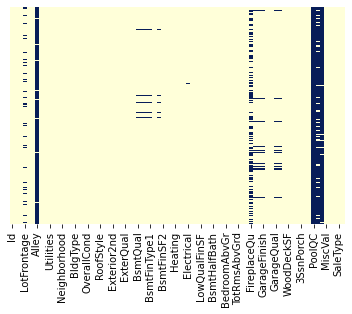

In [264]:
# Treating the null values

sns.heatmap(testdata.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')



In [265]:
testdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

#testdata.drop(['MoSold'],axis=1,inplace=True)
#testdata.drop(['MiscVal'],axis=1,inplace=True)
testdata.drop(['MiscFeature'],axis=1,inplace=True)
testdata.drop(['Alley','PoolQC'],axis=1,inplace=True)


In [273]:
#testdata.drop(['PoolQC'],axis=1,inplace=True)


testdata.drop(['FireplaceQu','Fence'],axis=1,inplace=True)

testdata.drop(['Id'],axis=1,inplace=True)


In [276]:
testdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [277]:
testdata.dropna(inplace=True)


In [278]:
testdata.shape


(223, 72)

In [279]:
testdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     223 non-null    int64  
 1   MSZoning       223 non-null    object 
 2   LotFrontage    223 non-null    float64
 3   LotArea        223 non-null    int64  
 4   Street         223 non-null    object 
 5   LotShape       223 non-null    object 
 6   LandContour    223 non-null    object 
 7   Utilities      223 non-null    object 
 8   LotConfig      223 non-null    object 
 9   LandSlope      223 non-null    object 
 10  Neighborhood   223 non-null    object 
 11  Condition1     223 non-null    object 
 12  Condition2     223 non-null    object 
 13  BldgType       223 non-null    object 
 14  HouseStyle     223 non-null    object 
 15  OverallQual    223 non-null    int64  
 16  OverallCond    223 non-null    int64  
 17  YearBuilt      223 non-null    int64  
 18  YearRemodA

In [280]:
#  check  the duplicate
duplicate = testdata[testdata.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate


Duplicate Rows :


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition


In [282]:
#Final test data set

testdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     223 non-null    int64  
 1   MSZoning       223 non-null    object 
 2   LotFrontage    223 non-null    float64
 3   LotArea        223 non-null    int64  
 4   Street         223 non-null    object 
 5   LotShape       223 non-null    object 
 6   LandContour    223 non-null    object 
 7   Utilities      223 non-null    object 
 8   LotConfig      223 non-null    object 
 9   LandSlope      223 non-null    object 
 10  Neighborhood   223 non-null    object 
 11  Condition1     223 non-null    object 
 12  Condition2     223 non-null    object 
 13  BldgType       223 non-null    object 
 14  HouseStyle     223 non-null    object 
 15  OverallQual    223 non-null    int64  
 16  OverallCond    223 non-null    int64  
 17  YearBuilt      223 non-null    int64  
 18  YearRemodA

In [283]:
# Applying the Label Encoder to the categorical_features
categorical_features  = [feature for feature in testdata.columns if testdata[feature].dtypes=="O"]
categorical_features


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [284]:
df2=le.fit_transform(testdata['LandContour'])
pd.Series(df2)
testdata['LandContour']=df2

df2=le.fit_transform(testdata['LotShape'])
pd.Series(df2)
testdata['LotShape']=df2

df2=le.fit_transform(testdata['Street'])
pd.Series(df2)
testdata['Street']=df2

df2=le.fit_transform(testdata['MSZoning'])
pd.Series(df2)
testdata['MSZoning']=df2


In [285]:
df2=le.fit_transform(testdata['Condition2'])
pd.Series(df2)
testdata['Condition2']=df2

df2=le.fit_transform(testdata['Condition1'])
pd.Series(df2)
testdata['Condition1']=df2

df2=le.fit_transform(testdata['Neighborhood'])
pd.Series(df2)
testdata['Neighborhood']=df2

df2=le.fit_transform(testdata['LandSlope'])
pd.Series(df2)
testdata['LandSlope']=df2

df2=le.fit_transform(testdata['LotConfig'])
pd.Series(df2)
testdata['LotConfig']=df2

df2=le.fit_transform(testdata['Utilities'])
pd.Series(df2)
testdata['Utilities']=df2


In [286]:
df2=le.fit_transform(testdata['MasVnrType'])
pd.Series(df2)
testdata['MasVnrType']=df2

df2=le.fit_transform(testdata['Exterior2nd'])
pd.Series(df2)
testdata['Exterior2nd']=df2

df2=le.fit_transform(testdata['Exterior1st'])
pd.Series(df2)
testdata['Exterior1st']=df2

df2=le.fit_transform(testdata['RoofMatl'])
pd.Series(df2)
testdata['RoofMatl']=df2

df2=le.fit_transform(testdata['RoofStyle'])
pd.Series(df2)
testdata['RoofStyle']=df2

df2=le.fit_transform(testdata['HouseStyle'])
pd.Series(df2)
testdata['HouseStyle']=df2

df2=le.fit_transform(testdata['BldgType'])
pd.Series(df2)
testdata['BldgType']=df2
df2=le.fit_transform(testdata['BsmtFinType2'])
pd.Series(df2)
testdata['BsmtFinType2']=df2

df2=le.fit_transform(testdata['BsmtFinType1'])
pd.Series(df2)
testdata['BsmtFinType1']=df2

df2=le.fit_transform(testdata['BsmtExposure'])
pd.Series(df2)
testdata['BsmtExposure']=df2

df2=le.fit_transform(testdata['BsmtCond'])
pd.Series(df2)
testdata['BsmtCond']=df2

df2=le.fit_transform(testdata['BsmtQual'])
pd.Series(df2)
testdata['BsmtQual']=df2

df2=le.fit_transform(testdata['Foundation'])
pd.Series(df2)
testdata['Foundation']=df2

df2=le.fit_transform(testdata['ExterCond'])
pd.Series(df2)
testdata['ExterCond']=df2

df2=le.fit_transform(testdata['ExterQual'])
pd.Series(df2)
testdata['ExterQual']=df2


In [287]:
df2=le.fit_transform(testdata['GarageType'])
pd.Series(df2)
testdata['GarageType']=df2

df2=le.fit_transform(testdata['Functional'])
pd.Series(df2)
testdata['Functional']=df2

df2=le.fit_transform(testdata['KitchenQual'])
pd.Series(df2)
testdata['KitchenQual']=df2

df2=le.fit_transform(testdata['Electrical'])
pd.Series(df2)
testdata['Electrical']=df2

df2=le.fit_transform(testdata['CentralAir'])
pd.Series(df2)
testdata['CentralAir']=df2

df2=le.fit_transform(testdata['HeatingQC'])
pd.Series(df2)
testdata['HeatingQC']=df2

df2=le.fit_transform(testdata['Heating'])
pd.Series(df2)
testdata['Heating']=df2
df2=le.fit_transform(testdata['SaleCondition'])
pd.Series(df2)
testdata['SaleCondition']=df2

df2=le.fit_transform(testdata['SaleType'])
pd.Series(df2)
testdata['SaleType']=df2

df2=le.fit_transform(testdata['PavedDrive'])
pd.Series(df2)
testdata['PavedDrive']=df2

df2=le.fit_transform(testdata['GarageCond'])
pd.Series(df2)
testdata['GarageCond']=df2

df2=le.fit_transform(testdata['GarageQual'])
pd.Series(df2)
testdata['GarageQual']=df2

df2=le.fit_transform(testdata['GarageFinish'])
pd.Series(df2)
testdata['GarageFinish']=df2


In [288]:
testdata.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,0,1,0,0,0,...,2,178,51,0,0,0,0,2007,4,2
3,70,2,75.0,12000,1,3,0,0,4,0,...,2,0,0,0,0,0,0,2009,4,2
4,60,2,86.0,14598,1,0,3,0,1,0,...,2,100,18,0,0,0,0,2008,4,2
6,180,3,35.0,3675,1,3,3,0,4,0,...,2,0,28,0,0,0,0,2006,4,2
7,20,2,107.0,13891,1,3,3,0,4,0,...,2,0,102,0,0,0,0,2008,3,3


In [289]:
# Selecting same faetures that we selected on the train data set

new_XX=testdata[['Street','OverallQual','ExterQual','GrLivArea','BsmtQual','GarageCars','KitchenQual','GarageArea','FullBath','YearBuilt','1stFlrSF','GarageFinish','MSZoning','MasVnrArea','LotArea','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','TotalBsmtSF','Foundation']]


In [290]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_XX)


In [291]:
# Predicting the sales price for last 2 rows Using GBDT Model

new_XX.tail(2)


,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,1stFlrSF,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation
290,1,6,3,1664,3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1
291,1,6,3,987,3,1,3,264,1,1973,483,2,3,408.0,1953,1973.0,1973,5,483,1


In [293]:
print ('predict SalePrice is',gbdt_clf.predict (([[3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1]])))


predict SalePrice is [301845.6319575]


In [294]:
print ('predict SalePrice is',gbdt_clf.predict (([[3,1,3,264,1,1947,1004,2,3,408.0,1953,1973.0,1973,5,483,1]])))


predict SalePrice is [298784.67557282]


Predicting for all the rows on test data Using GBDT Model


In [302]:
#y_pred = gbdt_clf.predict(new_XX)


In [296]:
y_pred.shape


(870,)

In [297]:
y_pred


array([ 58180.77422017, 183004.25296059, 147223.7897646 , 133927.94155764,
       337407.11153075, 286423.13796121, 211017.1067411 , 321111.79578064,
       218832.57038263, 204790.48425737, 145765.38718241, 194759.25164573,
        98963.04072097,  61616.1444227 , 261481.24163636, 134438.58182082,
       215343.76822311, 269936.38331729, 138180.61046436, 122543.8634031 ,
       197081.25425946, 156400.60300463, 135021.31420187,  81387.99927082,
       304003.80604544, 147585.15452809, 203283.94711248, 121523.96020616,
       174704.42094531, 111173.24297861, 295612.95091488, 310816.36222646,
       164879.92294352, 184508.39894416,  93987.05124695, 140943.32497349,
       192751.45305773, 133966.93954475, 392944.99347891, 183891.64125224,
       172029.29464077, 131089.29554199, 142110.90516773, 197603.10821299,
       325084.45918041, 244211.16770774, 207531.44936725, 150789.61974846,
       210021.63670423,  90791.85944461, 104127.59344283, 111555.20043512,
       167889.44537926, 2

In [298]:
new_XX


,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,1stFlrSF,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation
0,1,9,2,1922,0,3,2,676,2,2005,1922,0,2,200.0,14157,2005.0,2006,8,1922,2
3,1,7,3,1564,3,1,1,234,1,1941,860,2,2,0.0,12000,1941.0,1950,7,704,1
4,1,6,2,1933,2,3,2,668,2,2007,894,0,2,74.0,14598,2007.0,2007,9,894,2
6,1,5,3,1072,2,2,3,525,1,2005,1072,0,3,80.0,3675,2005.0,2005,5,547,2
7,1,8,2,1710,0,3,2,866,2,2007,1710,1,2,436.0,13891,2007.0,2008,6,1710,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,6,3,1425,3,2,3,576,2,1964,1425,1,2,272.0,10175,1964.0,1964,7,1425,1
287,1,8,3,1563,2,3,2,758,2,2007,1563,1,2,468.0,10206,2007.0,2007,6,1563,2
288,1,5,3,990,2,2,3,672,1,1994,990,2,2,0.0,9245,1996.0,1995,5,990,2
290,1,6,3,1664,3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1


Adding predicted total sale value to the dataset


In [301]:
#new_XX['Pred value'] = y_pred


In [300]:
new_XX.head()


,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,1stFlrSF,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation
0,1,9,2,1922,0,3,2,676,2,2005,1922,0,2,200.0,14157,2005.0,2006,8,1922,2
3,1,7,3,1564,3,1,1,234,1,1941,860,2,2,0.0,12000,1941.0,1950,7,704,1
4,1,6,2,1933,2,3,2,668,2,2007,894,0,2,74.0,14598,2007.0,2007,9,894,2
6,1,5,3,1072,2,2,3,525,1,2005,1072,0,3,80.0,3675,2005.0,2005,5,547,2
7,1,8,2,1710,0,3,2,866,2,2007,1710,1,2,436.0,13891,2007.0,2008,6,1710,2
